In [3]:
!pip install tensorflow opencv-python matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     --------- --------------------------- 41.0/159.4 kB 991.0 kB/s eta 0:00:01
     ------------------------------------ - 153.6/159.4 kB 1.8 MB/s eta 0:00:01
     ------------------------------------ - 153.6/159.4 kB 1.8 MB/s eta 0:00:01
     ------------------------------------ - 153.6/159.4 kB 1.8 MB/s eta 0:00:01
     ------------------------------------ - 153.6/159.4 kB 1.8 MB/s eta 0:00:01
     ------------------------------------ 159.4/159.4 kB 560.8 kB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.1 MB 6.9 MB/s eta 0:00:06
   ---------------------------------------- 0.5/38.1 MB 4.7 MB/s eta 0:00:09
    ----------------------

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
import cv2

In [70]:
data_dir = 'data'

In [71]:
import imghdr
image_exts = ['jpeg','jpg', 'bmp', 'png']


for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


In [72]:
import numpy as np
from matplotlib import pyplot as plt

In [73]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [74]:
data_iterator = data.as_numpy_iterator()

In [75]:
batch = data_iterator.next()

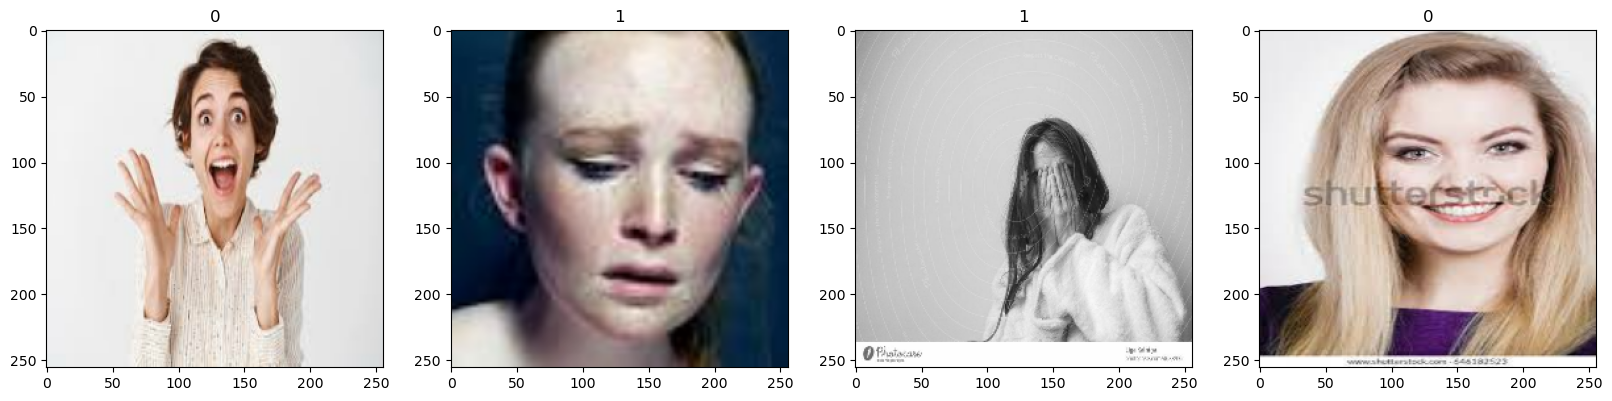

In [76]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [77]:
data = data.map(lambda x,y: (x/255, y))

In [78]:
data.as_numpy_iterator().next()

(array([[[[0.7312356 , 0.7312356 , 0.7312356 ],
          [0.7176471 , 0.7176471 , 0.7176471 ],
          [0.71813726, 0.71813726, 0.71813726],
          ...,
          [0.72156864, 0.72156864, 0.72156864],
          [0.72156864, 0.72156864, 0.72156864],
          [0.72156864, 0.72156864, 0.72156864]],
 
         [[0.7133148 , 0.7133148 , 0.7133148 ],
          [0.7176471 , 0.7176471 , 0.7176471 ],
          [0.71813726, 0.71813726, 0.71813726],
          ...,
          [0.72156864, 0.72156864, 0.72156864],
          [0.72156864, 0.72156864, 0.72156864],
          [0.72156864, 0.72156864, 0.72156864]],
 
         [[0.7176471 , 0.7176471 , 0.7176471 ],
          [0.72156864, 0.72156864, 0.72156864],
          [0.72156864, 0.72156864, 0.72156864],
          ...,
          [0.72156864, 0.72156864, 0.72156864],
          [0.72156864, 0.72156864, 0.72156864],
          [0.72156864, 0.72156864, 0.72156864]],
 
         ...,
 
         [[0.05098039, 0.4627451 , 0.6784314 ],
          [0.05098

In [79]:
len(data)

10

In [80]:
train_size = int(len(data)*.9)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [81]:
train_size

9

In [82]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [83]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [85]:
model = Sequential()

In [86]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [87]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [89]:
logdir = 'logs'

In [90]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 5s 383ms/step - loss: 0.7159 - accuracy: 0.5000 - val_loss: 0.6604 - val_accuracy: 0.5294
Epoch 2/20
9/9 [==============================] - 4s 375ms/step - loss: 0.6428 - accuracy: 0.5764 - val_loss: 0.5393 - val_accuracy: 0.7647
Epoch 3/20
9/9 [==============================] - 4s 384ms/step - loss: 0.6217 - accuracy: 0.7049 - val_loss: 0.6278 - val_accuracy: 0.7059
Epoch 4/20
9/9 [==============================] - 4s 366ms/step - loss: 0.4939 - accuracy: 0.7812 - val_loss: 0.4093 - val_accuracy: 0.8824
Epoch 5/20
9/9 [==============================] - 4s 392ms/step - loss: 0.3684 - accuracy: 0.8160 - val_loss: 0.2244 - val_accuracy: 0.9412
Epoch 6/20
9/9 [==============================] - 4s 384ms/step - loss: 0.3011 - accuracy: 0.8646 - val_loss: 0.2026 - val_accuracy: 0.9412
Epoch 7/20
9/9 [==============================] - 4s 383ms/step - loss: 0.2982 - accuracy: 0.8854 - val_loss: 0.1455 - val_accuracy: 1.0000
Epoch 8/20
9/9 [====

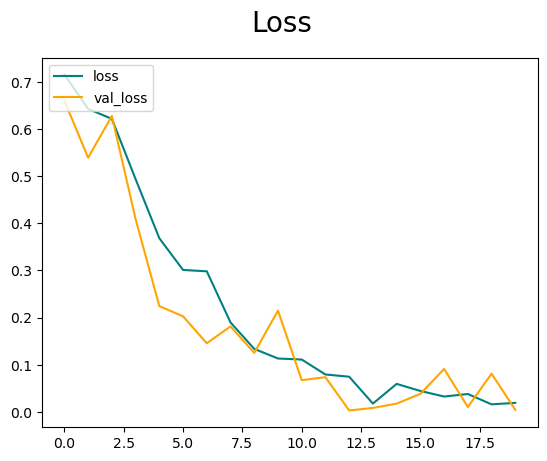

In [116]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [61]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [62]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [63]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 229ms/step


In [ ]:
print(precision.result(), recall.result(), accuracy.result())

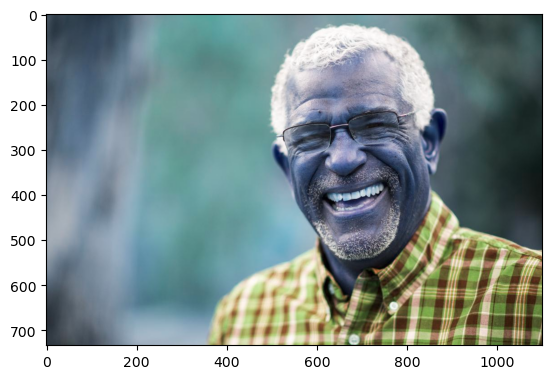

In [105]:
img = cv2.imread('smiling-senior.jpg')
plt.imshow(img)
plt.show()

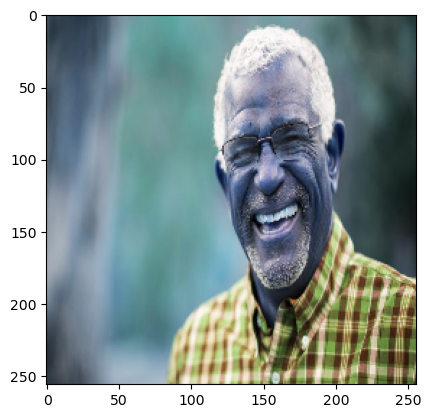

In [106]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [107]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 105ms/step


array([[0.99999636]], dtype=float32)

In [108]:
from tensorflow.keras.models import load_model

In [112]:
model.save(os.path.join('models','image_classifier.keras'))

In [115]:
new_model = load_model('models/image_classifier.keras')
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 102ms/step


array([[0.99999636]], dtype=float32)